# Brooke Hunter lab 5 submission

## Lab 5: Machine learning in Python

**Objectives:**
   * Engineer some features for better prediction of Seattle house prices 
   * Train a machine learning model using <code>scikit-learn</code>
   * Evaluate our machine learning model

***********
## Question 1 (10 points): 

To start, make a **new** `jupyter notebook` called `lab5_submission.ipynb` and work through the following tasks. 

The first task is answer the following questions using some of the methods we have covered in the lecture/demo. 

***********

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import data
df = pd.read_csv('E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab5/seattle_house_prices.csv')

# Read dataset
coast = gpd.read_file('E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab5/Washington_coastline.shp')

In [3]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

Amazon_lat_long

* How many houses are in this dataset?

In [4]:
num_rows = df.shape[0]
print('The number of houses in the data set is equal to the number of rows, so there are %i houses in this dataset' % (num_rows))

The number of houses in the data set is equal to the number of rows, so there are 19451 houses in this dataset


* How many **features** are there for predicting house price? 

In [5]:
num_features = df.shape[1] - 1
print('The number of features in the data set for predicting house price is equal to the number of columns (minus 1 for the price), so there are %i features in this dataset to predict house price' % (num_features))

The number of features in the data set for predicting house price is equal to the number of columns (minus 1 for the price), so there are 8 features in this dataset to predict house price


In [6]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,lat,long,geometry
0,538000,3,2.25,2570,7242,1951,47.7210,-122.319,POINT (-122.31900 47.72100)
1,180000,2,1.00,770,10000,1933,47.7379,-122.233,POINT (-122.23300 47.73790)
2,604000,4,3.00,1960,5000,1965,47.5208,-122.393,POINT (-122.39300 47.52080)
3,510000,3,2.00,1680,8080,1987,47.6168,-122.045,POINT (-122.04500 47.61680)
4,1230000,4,4.50,5420,101930,2001,47.6561,-122.005,POINT (-122.00500 47.65610)
...,...,...,...,...,...,...,...,...,...
19446,475000,3,2.50,1310,1294,2008,47.5773,-122.409,POINT (-122.40900 47.57730)
19447,360000,3,2.50,1530,1131,2009,47.6993,-122.346,POINT (-122.34600 47.69930)
19448,400000,4,2.50,2310,5813,2014,47.5107,-122.362,POINT (-122.36200 47.51070)
19449,400000,3,2.50,1600,2388,2004,47.5345,-122.069,POINT (-122.06900 47.53450)


* Are there any null values in this dataset?

There are **no** null values in this dataset.. really?

In [7]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
lat            0
long           0
geometry       0
dtype: int64

### Correlation matrix
Correlation matrix to find the best predictors of house price of `median_house_value`.

In [8]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price          1.000000
sqft_living    0.702296
bathrooms      0.524395
bedrooms       0.315804
lat            0.308082
sqft_lot       0.090125
yr_built       0.052453
long           0.020092
Name: price, dtype: float64

* Which three variables are best correlated with house price (include correlation coefficients)?

**Best correlated** three 

* sqft_living
* bathrooms
* bedrooms

* Which three variables are least correlated with house price (include correlation coefficients)?

**Least correlated** three 

* sqft_lot
* yr_built
* long

*******

## Question 2 (30 points):

*******

* Produce a model to predict house prices. You are welcome to generate new features, scale the data, and split the data into training/testing (i.e. `train_test_split`) in any way you like. 

# Model 1 
* Added distance to coastline to features

In [9]:
# Compute distance to coast for Seattle housing
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

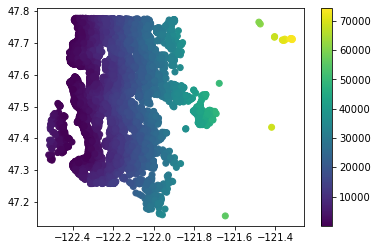

In [10]:
# Plot of distance to coastline for seattle
plt.scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_coast'])
plt.colorbar()

## Model 1 confusion matrix

In [11]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                1.000000
sqft_living          0.702296
bathrooms            0.524395
bedrooms             0.315804
lat                  0.308082
sqft_lot             0.090125
yr_built             0.052453
distance_to_coast    0.027830
long                 0.020092
Name: price, dtype: float64

## Fit a model 1 to data

In [ ]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built', 'distance_to_coast']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

## Evaluate model 1

In [ ]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

# Model 2

## Add some variables

In [ ]:
# Rooms per house
gdf_utm['sqftLIV_per_bedroom'] = gdf_utm['sqft_living'] / gdf_utm['bedrooms']

# Bathrooms per bedroom
gdf_utm['bathrooms_per_bedroom'] = gdf_utm['bathrooms'] / gdf_utm['bedrooms']



## Task 1 (10 points):

Submit a project idea to the `#final-projects` channel on **Slack**. See: https://github.com/JohnnyRyan1/geospatial-data-science/blob/master/labs/lab5/project_ideas_task.md for more details.


## Remember to submit your answers to Questions 1 and 2 and complete Task 1 **by Friday 11:59pm**